### Import the libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Load the dataset

In [2]:
df = pd.read_csv(r'data/data_science_job.csv')

In [3]:
df.head()

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,training_hours,target
0,8949,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,20.0,NaN,NaN,36.0,1.0
1,29725,city_40,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15.0,50-99,Pvt Ltd,47.0,0.0
2,11561,city_21,0.624,NaN,No relevent experience,Full time course,Graduate,STEM,5.0,NaN,NaN,83.0,0.0
3,33241,city_115,0.789,NaN,No relevent experience,NaN,Graduate,Business Degree,0.0,NaN,Pvt Ltd,52.0,1.0
4,666,city_162,0.767,Male,Has relevent experience,no_enrollment,Masters,STEM,20.0,50-99,Funded Startup,8.0,0.0


### Check percent of missing values

In [4]:
df.isnull().mean()

enrollee_id               0.000000
city                      0.000000
city_development_index    0.025003
gender                    0.235306
relevent_experience       0.000000
enrolled_university       0.020148
education_level           0.024011
major_discipline          0.146832
experience                0.003393
company_size              0.309949
company_type              0.320493
training_hours            0.039983
target                    0.000000
dtype: float64

In [5]:
df.isnull().mean() * 100

enrollee_id                0.000000
city                       0.000000
city_development_index     2.500261
gender                    23.530640
relevent_experience        0.000000
enrolled_university        2.014824
education_level            2.401086
major_discipline          14.683161
experience                 0.339284
company_size              30.994885
company_type              32.049274
training_hours             3.998330
target                     0.000000
dtype: float64

* 23.53 % of the values are missing in `gender` column.
* 14.68 % of the values are missing in `major_discipline` column.
* 30.99 % of the values are missing in `company_size` column.
* 32.04 % of the values are missing in `company_type` column. 

**Cannot perfrom CCA on the columns - gender, major_discipline, company_size and company_type.**

In [6]:
df.shape

(19158, 13)

### Columns on which CCA can be performed

* Missing values percentage should be less than 5 %

In [7]:
cols = [col for col in df.columns if df[col].isnull().mean() * 100 < 5.0 and df[col].isnull().mean() * 100 > 0.0]

In [8]:
cols

['city_development_index',
 'enrolled_university',
 'education_level',
 'experience',
 'training_hours']

In [9]:
df[cols].head(5)

,city_development_index,enrolled_university,education_level,experience,training_hours
0,0.920,no_enrollment,Graduate,20.0,36.0
1,0.776,no_enrollment,Graduate,15.0,47.0
2,0.624,Full time course,Graduate,5.0,83.0
3,0.789,NaN,Graduate,0.0,52.0
4,0.767,no_enrollment,Masters,20.0,8.0


### How much percent of data will be left if we drop the missing values

In [10]:
# Length of dropped rows divided by total rows
(len(df[cols].dropna()) / len(df)) * 100

89.68577095730244

### Drop the missing values

In [11]:
new_df = df[cols].dropna()

In [12]:
new_df.shape

(17182, 5)

In [13]:
df.shape

(19158, 13)

### Visualizing the distributions (before and after dropping missing values)

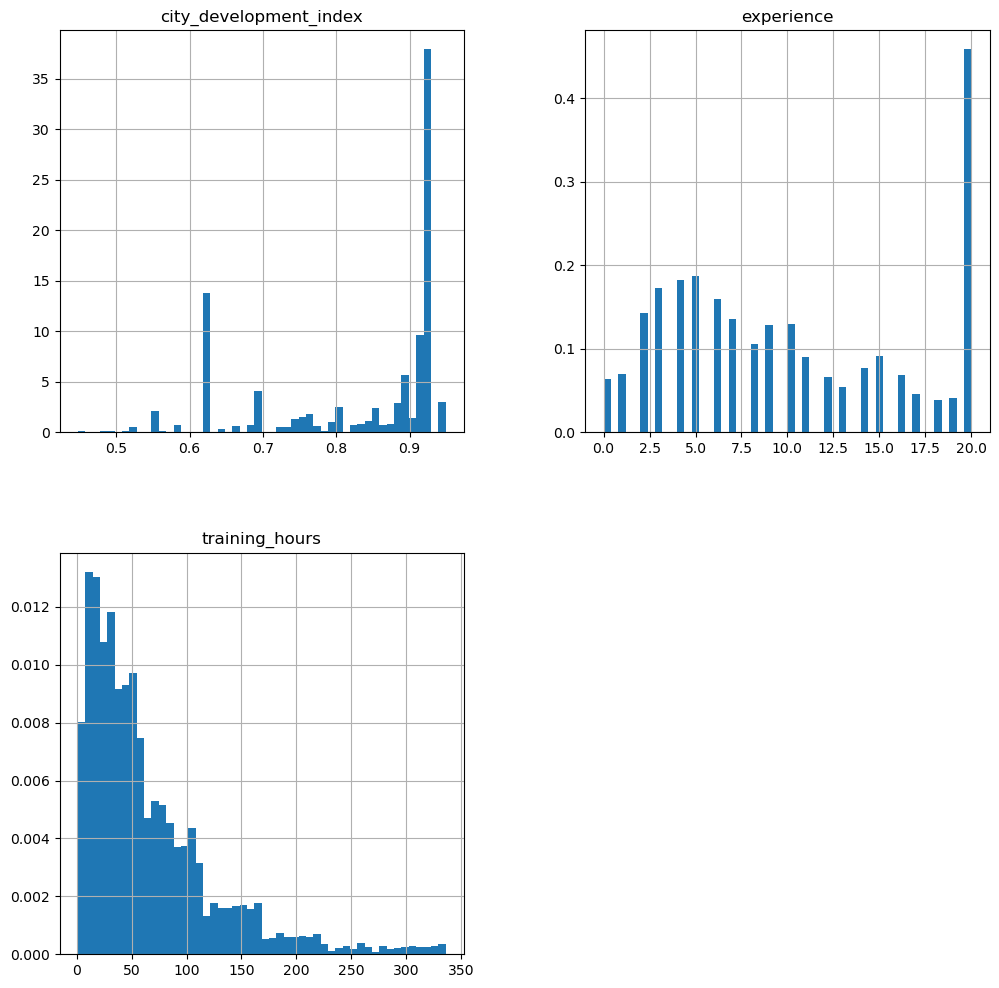

In [14]:
new_df.hist(bins=50, density=True, figsize=(12, 12))
plt.show();

In [15]:
def visualize(col):
    fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(10, 5))

    # 1st row - histograms
    sns.histplot(df[col], bins=50, color='blue', stat='density', ax=ax[0, 0])
    ax[0, 0].set_title(f'"{col}" With Missing Values (Histogram)')
    ax[0, 0].set_xlabel(col)
    ax[0, 0].set_ylabel('Density')

    sns.histplot(df[col].dropna(), bins=50, color='red', stat='density', ax=ax[0, 1])
    ax[0, 1].set_title(f'"{col}" Without Missing Values (Histogram)')
    ax[0, 1].set_xlabel(col)
    ax[0, 1].set_ylabel('Density')

    # 2nd row - KDE plots
    sns.kdeplot(df[col], color='skyblue', ax=ax[1, 0])
    ax[1, 0].set_title(f'"{col}" With Missing Values (KDE)')
    ax[1, 0].set_xlabel(col)
    ax[1, 0].set_ylabel('Density')

    sns.kdeplot(df[col].dropna(), color='red', ax=ax[1, 1])
    ax[1, 1].set_title(f'"{col}" Without Missing Values (KDE)')
    ax[1, 1].set_xlabel(col)
    ax[1, 1].set_ylabel('Density')

    plt.tight_layout()
    plt.show()

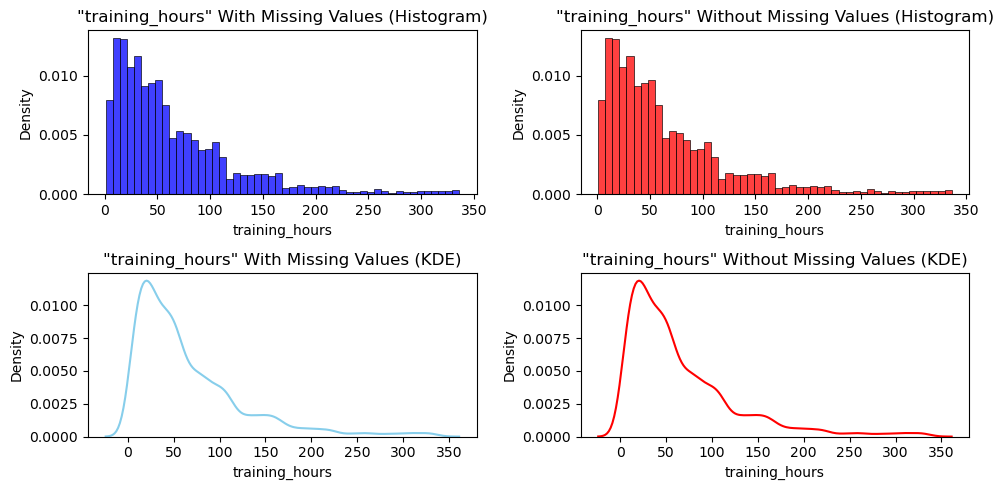

In [16]:
visualize('training_hours')

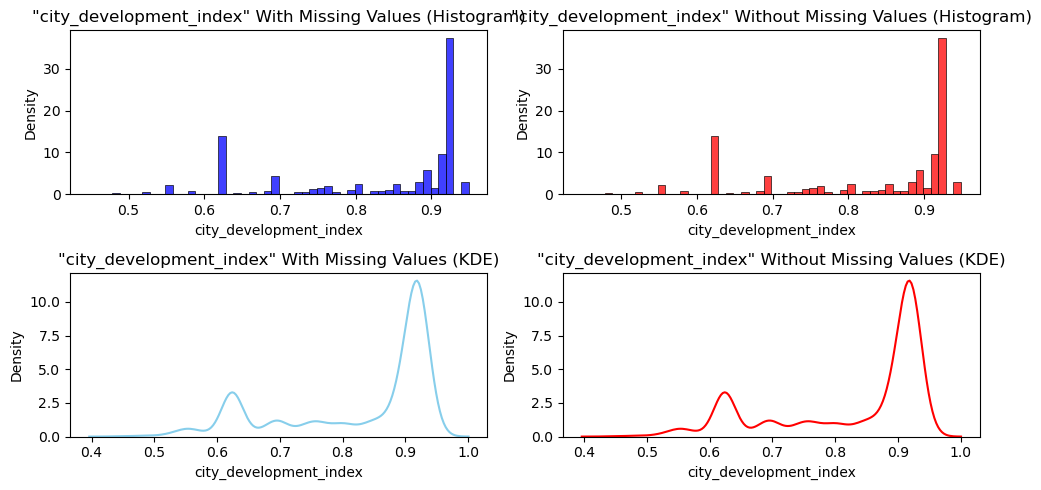

In [17]:
visualize('city_development_index')

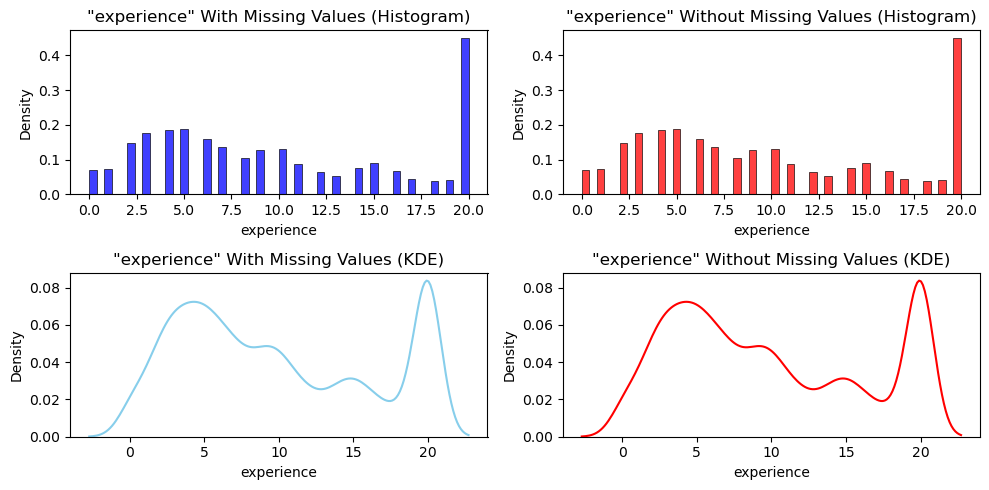

In [18]:
visualize('experience')

### Ensure that we have the same ratio of categorical columns before and after CCA

**Class Imbalance nahi hona chahiye**

In [19]:
new_df.columns

Index(['city_development_index', 'enrolled_university', 'education_level',
       'experience', 'training_hours'],
      dtype='object')

In [20]:
temp = pd.concat([
            # percentage of observations per category, original data
            df['enrolled_university'].value_counts() / len(df),

            # percentage of observations per category, cca data
            new_df['enrolled_university'].value_counts() / len(new_df)
        ],
        axis=1)

# add column names
temp.columns = ['original', 'cca']
temp

,original,cca
enrolled_university,,
no_enrollment,0.721213,0.735188
Full time course,0.196106,0.200733
Part time course,0.062533,0.064079


In [21]:
temp = pd.concat([
            # percentage of observations per category, original data
            df['education_level'].value_counts() / len(df),

            # percentage of observations per category, cca data
            new_df['education_level'].value_counts() / len(new_df)
        ],
        axis=1)

# add column names
temp.columns = ['original', 'cca']
temp

,original,cca
education_level,,
Graduate,0.605387,0.619835
Masters,0.227633,0.234082
High School,0.105282,0.107380
Phd,0.021610,0.022116
Primary School,0.016077,0.016587
